# Proyek Analisis Data: [E-Commerce Public Dataset (Sumber)]
- **Nama:** [Raden Cahya Kartika Triadi Putra]
- **Email:** [black102310@gmail.com]
- **ID Dicoding:** [MC009D5Y0828]

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
- Bagaimana pola penjualan bulanan dari e-commerce ini?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving E-commerce-public-dataset.zip to E-commerce-public-dataset.zip


In [3]:
import zipfile
import os

zip_path = "/content/E-commerce-public-dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))

['E-Commerce Public Dataset']


In [4]:
extract_path = "/content/dataset/E-Commerce Public Dataset"

customers = pd.read_csv(extract_path + '/customers_dataset.csv')

In [5]:
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')


In [6]:
print("Orders Dataset:")
print(orders.head(), "\n")

print("Order Items Dataset:")
print(order_items.head(), "\n")

print("Order Payments Dataset:")
print(order_payments.head(), "\n")

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00  

**Insight:**
- xxx
- xxx

### Assessing Data

In [7]:
orders.info()
order_items.info()
order_payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 

In [8]:
print("Orders Dataset Shape:", orders.shape)
print("Order Items Dataset Shape:", order_items.shape)
print("Order Payments Dataset Shape:", order_payments.shape, "\n")


Orders Dataset Shape: (99441, 8)
Order Items Dataset Shape: (112650, 7)
Order Payments Dataset Shape: (103886, 5) 



In [9]:
print("Unique Payment Methods:", order_payments['payment_type'].unique(), "\n")
print("Unique Order Status:", orders['order_status'].unique(), "\n")

Unique Payment Methods: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined'] 

Unique Order Status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved'] 



In [10]:
print("Order Payments Dataset Statistics:")
print(order_payments.describe(), "\n")

Order Payments Dataset Statistics:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000 



In [11]:
print("Missing Values in Orders Dataset:")
print(orders.isnull().sum(), "\n")

print("Missing Values in Order Items Dataset:")
print(order_items.isnull().sum(), "\n")

print("Missing Values in Order Payments Dataset:")
print(order_payments.isnull().sum(), "\n")

Missing Values in Orders Dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Missing Values in Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Missing Values in Order Payments Dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 



In [12]:
print("Orders Dataset Info:")
print(orders.info(), "\n")

print("Order Items Dataset Info:")
print(order_items.info(), "\n")

print("Order Payments Dataset Info:")
print(order_payments.info(), "\n")

Orders Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

Order Items Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   ----

**Insight:**
- xxx
- xxx

### Cleaning Data

In [13]:
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')


In [14]:
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)

In [15]:
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
order_payments.dropna(inplace=True)

In [16]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
order_payments['payment_value'] = order_payments['payment_value'].astype(float)

In [17]:
orders_cleaned = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]
order_items_cleaned = order_items[['order_id', 'product_id', 'price', 'freight_value']]
order_payments_cleaned = order_payments[['order_id', 'payment_type', 'payment_value']]

In [18]:
print("Orders Dataset Cleaned:")
print(orders_cleaned.head(), "\n")

print("Order Items Dataset Cleaned:")
print(order_items_cleaned.head(), "\n")

print("Order Payments Dataset Cleaned:")
print(order_payments_cleaned.head(), "\n")

Orders Dataset Cleaned:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp  
0    delivered      2017-10-02 10:56:33  
1    delivered      2018-07-24 20:41:37  
2    delivered      2018-08-08 08:38:49  
3    delivered      2017-11-18 19:28:06  
4    delivered      2018-02-13 21:18:39   

Order Items Dataset Cleaned:
                           order_id                        product_id   price  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.90   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f  239.90   
2  000229ec

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

### Pertanyaan 1:

<ipython-input-19-02d41fe58ecc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


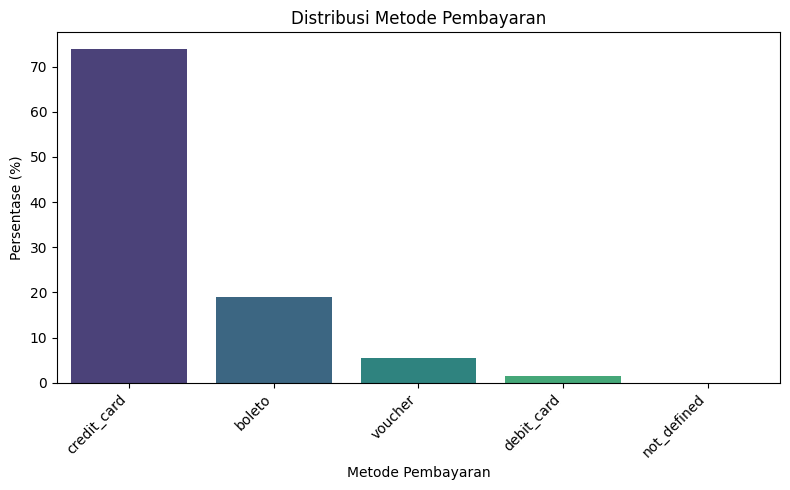

In [19]:
payment_counts = order_payments['payment_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Persentase (%)")
plt.title("Distribusi Metode Pembayaran")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

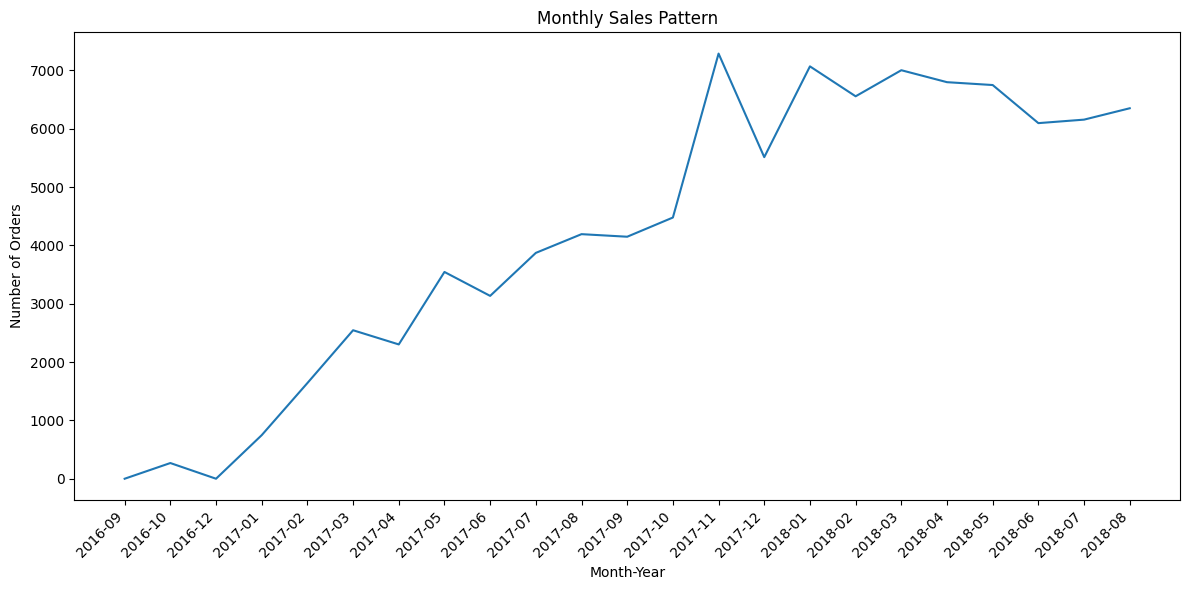

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = orders.groupby('month_year')['order_id'].count().reset_index()

monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='order_id', data=monthly_orders)
plt.xlabel("Month-Year")
plt.ylabel("Number of Orders")
plt.title("Monthly Sales Pattern")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1

  Dari analisis yang saya lakukan, mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran utama, dengan persentase tertinggi dibandingkan metode lain. Ini menunjukkan bahwa pelanggan lebih memilih transaksi yang praktis dan cepat, serta kemungkinan adanya fasilitas cicilan atau promo khusus kartu kredit.


- Pertanyaan 2

  Dari analisis yang saya lakukan, tren penjualan menunjukkan peningkatan dari tahun ke tahun, dengan lonjakan signifikan pada akhir tahun 2017 (November - Desember). Saya menduga hal ini terjadi karena adanya event belanja besar seperti Black Friday, Cyber Monday, atau promo akhir tahun yang meningkatkan jumlah pesanan secara drastis.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-21-1309bda4db2c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


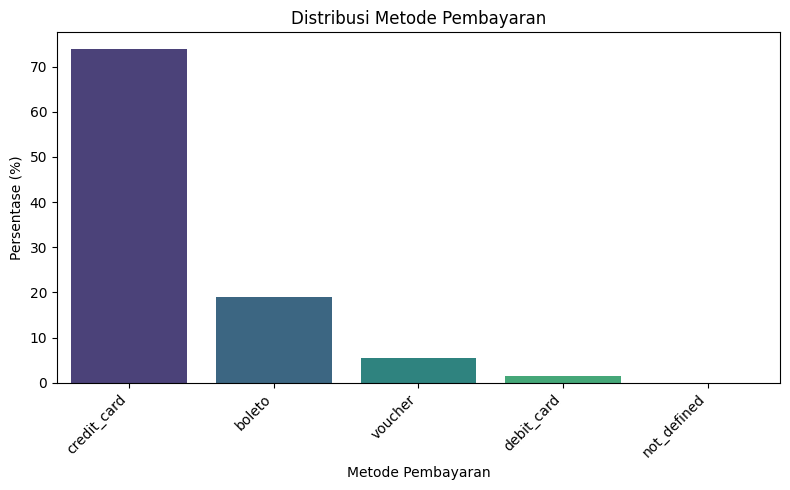

In [21]:
plt.figure(figsize=(8, 5))
payment_counts = order_payments['payment_type'].value_counts(normalize=True) * 100

sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Persentase (%)")
plt.title("Distribusi Metode Pembayaran")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

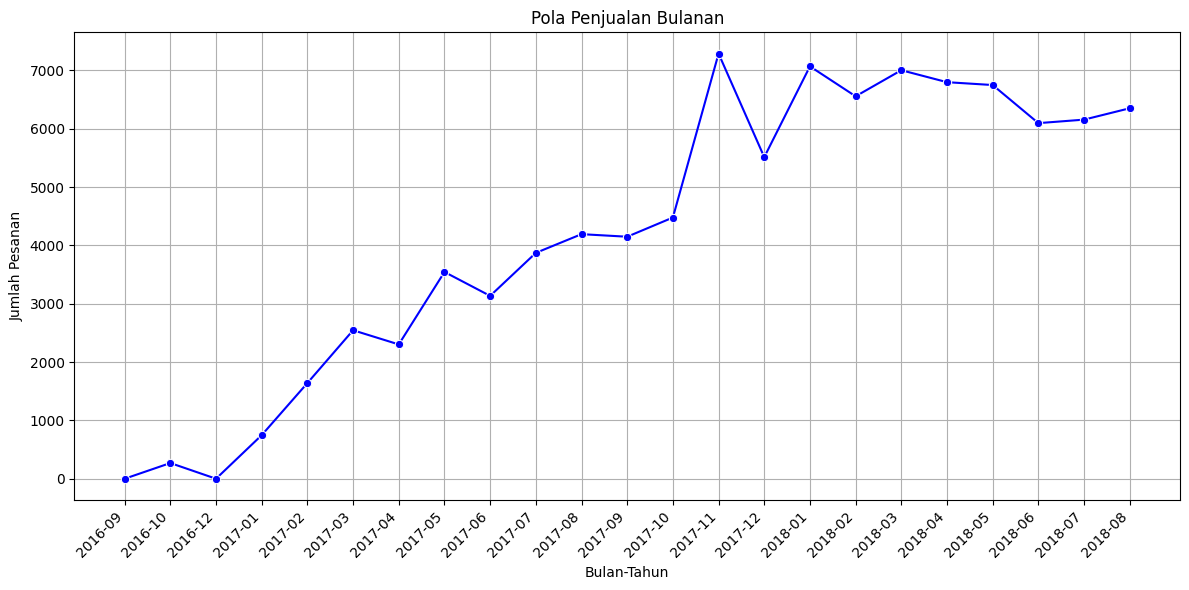

In [22]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = orders.groupby('month_year')['order_id'].count().reset_index()

monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='order_id', data=monthly_orders, marker='o', color='b', linestyle='-')
plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Pesanan")
plt.title("Pola Penjualan Bulanan")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1

   Berdasarkan analisis saya Mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran utama. Hal ini menunjukkan bahwa pelanggan lebih memilih metode yang praktis, memiliki fitur cicilan, dan dapat memberikan keuntungan seperti cashback atau poin reward.


- Pertanyaan 2

  Berdasarkan analisis saya dalam pola penjualan bulanan, terlihat adanya tren peningkatan jumlah pesanan dari tahun ke tahun. Lonjakan signifikan terjadi pada akhir tahun, khususnya pada bulan November - Desember 2017.

## Analisis Lanjutan (Opsional)

In [25]:

all_df = pd.merge(orders_cleaned, order_items_cleaned, on='order_id', how='left')
all_df = pd.merge(all_df, order_payments_cleaned, on='order_id', how='left')

all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1

  Dari analisis yang saya lakukan di distribusi metode pembayaran, dapat disimpulkan bahwa metode pembayaran yang paling sering digunakan oleh pelanggan adalah credit card. Hal ini menunjukkan bahwa pelanggan lebih memilih metode pembayaran yang cepat dan mudah digunakan. Perusahaan dapat mempertimbangkan untuk meningkatkan fasilitas pembayaran digital guna meningkatkan kenyamanan pelanggan.

- Conclution pertanyaan 2

  Berdasarkan analisis yang saya lakukan, pola penjualan bulanan menunjukkan bahwa penjualan cenderung meningkat pada akhir tahun. Hal ini kemungkinan disebabkan oleh promo besar seperti diskon akhir tahun dan musim belanja, yang mendorong lebih banyak pelanggan untuk bertransaksi. Tren ini bisa menjadi pertimbangan bagi perusahaan dalam menyusun strategi pemasaran dan pengelolaan stok produk agar lebih optimal selama periode puncak penjualan.